In [342]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import sklearn
from sklearn.decomposition import PCA
from sklearn import tree
import math
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
import pickle

def rmse(target,prediction):
    return(np.sqrt(((target - prediction)**2).sum()/len(target)))

In [3]:
monthly_data = pd.read_csv('/Users/reibertoldi/Documents/UBC/EOSC 510/Final Project/Analysis/Build/monthly_good_sites.csv')
monthly_data = monthly_data.sort_values(by=['site_code', 'dates'])
monthly_data = monthly_data.reset_index(level=0)

In [4]:
monthly_data

,index,site_code,dates,mean_gse
0,0,332367N1167165W001,2015-01,35.980
1,983,332367N1167165W001,2015-02,35.690
2,1966,332367N1167165W001,2015-03,35.520
3,2949,332367N1167165W001,2015-04,35.920
4,3932,332367N1167165W001,2015-05,35.670
...,...,...,...,...
70771,66843,398170N1203478W002,2020-08,30.390
70772,67826,398170N1203478W002,2020-09,41.190
70773,68809,398170N1203478W002,2020-10,32.095
70774,69792,398170N1203478W002,2020-11,26.090


In [10]:
groups = monthly_data.groupby('site_code')
keys = groups.groups.keys()
 
for i in keys:
    print(groups.get_group(i))
    print('\n')

    index           site_code    dates  mean_gse
0       0  332367N1167165W001  2015-01     35.98
1     983  332367N1167165W001  2015-02     35.69
2    1966  332367N1167165W001  2015-03     35.52
3    2949  332367N1167165W001  2015-04     35.92
4    3932  332367N1167165W001  2015-05     35.67
..    ...                 ...      ...       ...
67  65861  332367N1167165W001  2020-08     33.90
68  66844  332367N1167165W001  2020-09     34.44
69  67827  332367N1167165W001  2020-10     34.35
70  68810  332367N1167165W001  2020-11     34.41
71  69793  332367N1167165W001  2020-12     34.26

[72 rows x 4 columns]


     index           site_code    dates  mean_gse
72       1  332742N1166846W001  2015-01     31.05
73     984  332742N1166846W001  2015-02     29.11
74    1967  332742N1166846W001  2015-03     31.10
75    2950  332742N1166846W001  2015-04     31.70
76    3933  332742N1166846W001  2015-05     31.77
..     ...                 ...      ...       ...
139  65862  332742N1166846W001  2020-

       index           site_code    dates  mean_gse
39168    544  370784N1220587W001  2015-01     15.00
39169   1527  370784N1220587W001  2015-02     15.00
39170   2510  370784N1220587W001  2015-03       NaN
39171   3493  370784N1220587W001  2015-04     15.00
39172   4476  370784N1220587W001  2015-05       NaN
...      ...                 ...      ...       ...
39235  66405  370784N1220587W001  2020-08       NaN
39236  67388  370784N1220587W001  2020-09       NaN
39237  68371  370784N1220587W001  2020-10     14.85
39238  69354  370784N1220587W001  2020-11     15.10
39239  70337  370784N1220587W001  2020-12     15.20

[72 rows x 4 columns]


       index           site_code    dates  mean_gse
39240    545  370800N1215736W001  2015-01    113.41
39241   1528  370800N1215736W001  2015-02    110.02
39242   2511  370800N1215736W001  2015-03    108.23
39243   3494  370800N1215736W001  2015-04    109.39
39244   4477  370800N1215736W001  2015-05    112.07
...      ...                 ...      .

In [6]:
incomplete_data = monthly_data[['index','mean_gse']]

In [7]:
incomplete_data

,index,mean_gse
0,0,35.980
1,983,35.690
2,1966,35.520
3,2949,35.920
4,3932,35.670
...,...,...
70771,66843,30.390
70772,67826,41.190
70773,68809,32.095
70774,69792,26.090


In [8]:
imputer = KNNImputer(n_neighbors=4, weights="uniform")
imputed_data = imputer.fit_transform(incomplete_data)
imputed_data = pd.DataFrame(imputed_data, columns=['index', 'WLM_GSE'])
imputed_data = imputed_data.rename(columns={"WLM_GSE":"WLM_GSE_impute"})

In [53]:
merge_out = monthly_data.merge(imputed_data, on='index', how='left')
merge_out.to_csv('imputed_monthly.csv')

In [525]:
monthly_data = pd.read_csv('/Users/reibertoldi/Documents/UBC/EOSC 510/Final Project/Analysis/Build/data_for_PCA.csv')

In [245]:
monthly_data

,dates,332367N1167165W001,332742N1166846W001,332839N1167395W001,332867N1167043W001,333103N1166879W001,334686N1176782W002,335006N1176517W001,338733N1175573W001,338764N1175537W001,...,390863N1215340W001,391114N1215105W001,392094N1215414W001,392145N1214873W001,392406N1214951W001,392406N1214951W002,392406N1214951W003,392727N1215762W001,392727N1215762W002,392952N1215180W001
0,2015-01,35.98,31.05,51.62,103.52,33.42,19.520571,38.216000,151.00,111.60,...,27.065667,25.18500,15.52000,25.221000,98.201250,98.04375,97.275500,26.10575,27.80750,56.29175
1,2015-02,35.69,29.11,52.35,105.05,33.61,18.817879,36.842857,159.45,112.95,...,26.486500,25.06750,13.68250,23.286333,96.875333,96.86000,95.597333,24.92000,24.42600,51.66700
2,2015-03,35.52,31.10,52.91,106.60,33.83,18.414889,35.300606,157.00,104.30,...,26.411333,25.03100,14.66350,22.750000,95.734000,95.73725,94.463250,25.55600,26.69750,48.54575
3,2015-04,35.92,31.70,53.95,108.21,33.95,18.317143,35.039655,168.80,113.75,...,28.089800,25.06960,20.79925,34.669000,94.926000,94.83225,94.740000,26.09900,32.28025,55.94675
4,2015-05,35.67,31.77,54.34,109.42,34.17,18.031000,34.123667,158.90,115.65,...,33.400750,26.06425,26.99750,51.483750,96.040000,96.21900,97.742750,29.51675,41.15075,82.16625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2020-08,33.90,27.90,28.18,72.16,25.33,22.682258,9.752258,110.60,94.10,...,31.475500,23.31675,39.97100,69.348222,105.683250,106.63575,111.809250,32.31150,54.21250,92.91075
68,2020-09,34.44,27.48,28.90,73.31,25.75,23.321000,10.026667,138.80,96.20,...,29.018000,23.21480,27.23400,45.684600,107.752400,108.04180,108.956400,31.77840,41.30240,73.57280
69,2020-10,34.35,27.20,29.00,69.81,26.04,23.543548,10.659231,141.10,94.80,...,27.746750,23.40325,20.92550,33.065250,106.802000,106.69625,105.391250,31.30350,34.64650,67.02550
70,2020-11,34.41,27.15,28.95,74.90,26.98,23.260667,10.003077,141.20,95.50,...,26.425500,23.05725,18.91800,29.717750,104.994250,104.77675,103.019750,29.32600,31.32950,61.83500


In [115]:
data = monthly_data.drop(['dates'], axis=1)
data = data.T
data_norm = (data - data.mean())/data.std()

In [121]:
## PCA

In [116]:
n_modes = np.min(np.shape(data))
pca = PCA(n_components = n_modes)
PCs = pca.fit_transform(data)
eigvecs = pca.components_
fracVar = pca.explained_variance_ratio_

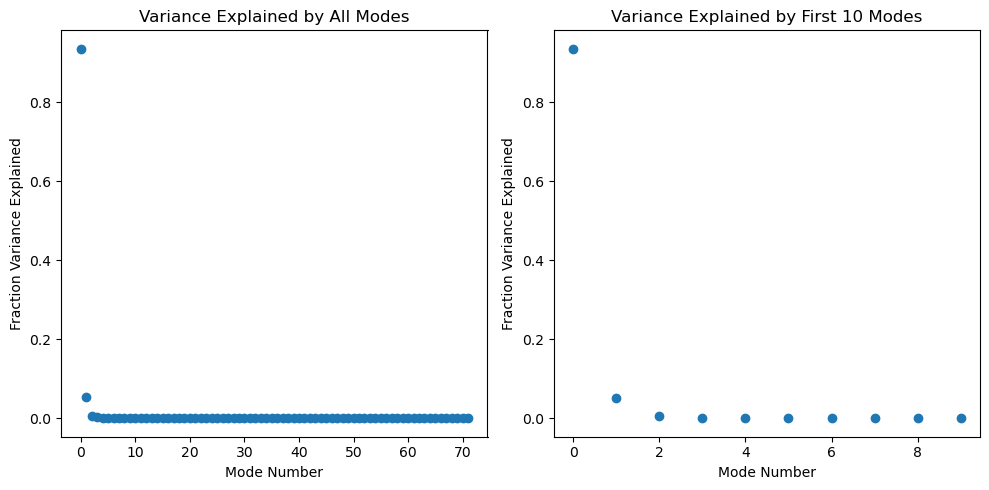

In [117]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(range(len(fracVar)),fracVar)
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by All Modes')

plt.subplot(1,2,2)
n_modes_show = 10
plt.scatter(range(n_modes_show),fracVar[:n_modes_show])
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by First ' + str(n_modes_show) + ' Modes')

plt.tight_layout()

plt.show()

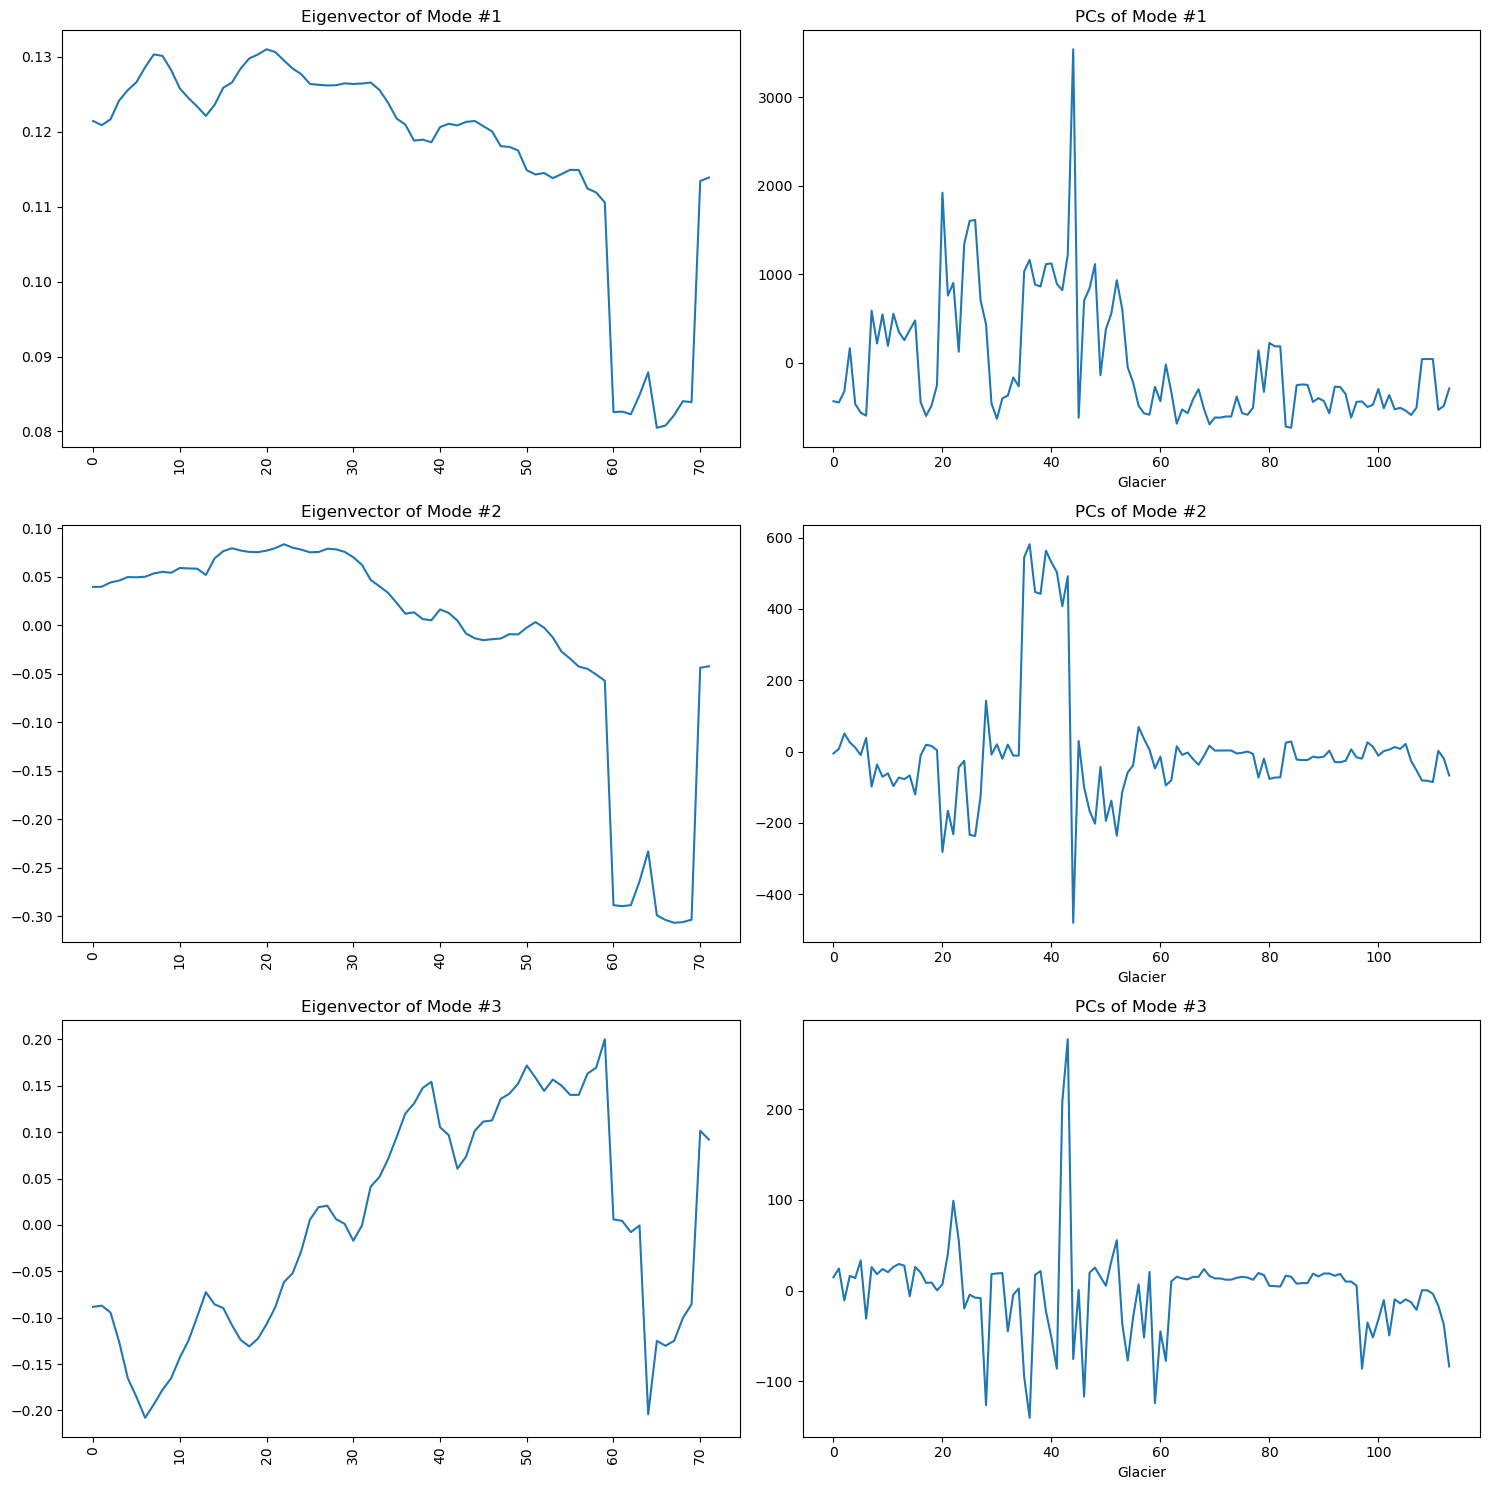

In [118]:
n = 3

plt.figure(figsize=(15,5*n))
for kk in range(n):
    
    plt.subplot(n,2,kk*2+1)
    plt.plot(range(0,72),eigvecs[kk,:])
    plt.xticks(rotation=90)
    plt.title('Eigenvector of Mode #' + str(kk+1))
    
    plt.subplot(n,2,(kk+1)*2)
    plt.plot(PCs[:,kk])
    plt.title('PCs of Mode #' + str(kk+1))
    plt.xlabel('Glacier')
    
    plt.tight_layout()

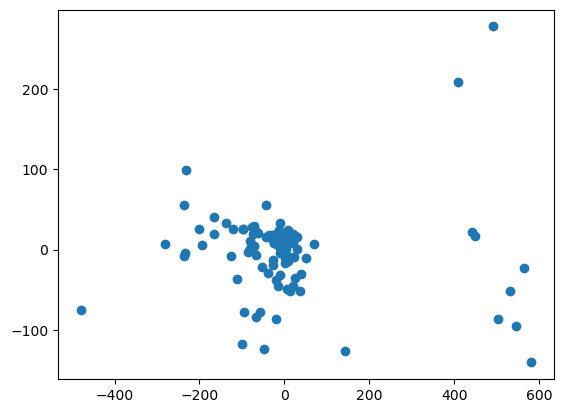

In [119]:
plt.scatter(PCs[:,1], PCs[:,2])

In [ ]:
## Decision Tree

In [160]:
tree_data = pd.read_csv('/Users/reibertoldi/Documents/UBC/EOSC 510/Final Project/Analysis/Build/data_for_tree.csv')
tree_data_c = pd.read_csv('/Users/reibertoldi/Documents/UBC/EOSC 510/Final Project/Analysis/Build/data_for_tree_complete.csv')

In [163]:
tree_data = tree_data.dropna()
x = tree_data[['year', 'month', 'gse_means']]
y = np.array(tree_data['y'])

In [164]:
clf = tree.DecisionTreeRegressor()
clf = clf.fit(x, y)

In [165]:
X = tree_data_c[['year', 'month', 'gse_means']]
Y = tree_data_c['y']
Y_predict = clf.predict(X)

In [167]:
mse = sklearn.metrics.mean_squared_error(Y, Y_predict) 
rmse = math.sqrt(mse)  
coefficient_of_dermination = r2_score(Y, Y_predict)
coefficient_of_dermination

0.8401093997393794

In [548]:
rmse

0.43608266209990565

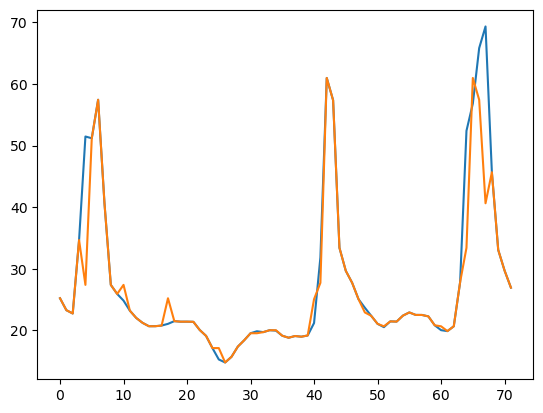

In [168]:
plt.plot(np.vstack((Y,Y_predict)).T)

In [522]:
intersections = pd.read_csv('/Users/reibertoldi/Documents/UBC/EOSC 510/Final Project/Analysis/Build/complete_intersections.csv')

In [523]:
intersections

,site_code1,site_code2
0,332367N1167165W001,332367N1167165W001
1,332367N1167165W001,332742N1166846W001
2,332367N1167165W001,332839N1167395W001
3,332367N1167165W001,332867N1167043W001
4,332367N1167165W001,333103N1166879W001
...,...,...
1055,392952N1215180W001,392406N1214951W002
1056,392952N1215180W001,392406N1214951W003
1057,392952N1215180W001,392727N1215762W001
1058,392952N1215180W001,392727N1215762W002


In [549]:
lis = intersections[intersections.site_code1 == "392406N1214951W002"].site_code2.tolist()
monthly_filtered = monthly_data[lis]
monthly_filtered = monthly_filtered.rename({"392406N1214951W002":"y"}, axis=1)
monthly_filtered_norm = (monthly_filtered - monthly_filtered.mean())/monthly_filtered.std()
y_complete = monthly_filtered_norm['y']
x_complete = np.array(monthly_filtered_norm.drop(['y'],axis=1))

In [550]:
monthly_filtered_norm

,391114N1215105W001,392094N1215414W001,392145N1214873W001,392406N1214951W001,y,392406N1214951W003,392727N1215762W001,392727N1215762W002,392952N1215180W001
0,0.548765,-0.199623,-0.167058,0.974074,0.926597,0.737600,0.371869,-0.107270,0.171720
1,0.524839,-0.397037,-0.316081,0.764219,0.739612,0.489828,0.190056,-0.399928,-0.065116
2,0.517406,-0.291642,-0.357394,0.583578,0.562262,0.322386,0.287575,-0.203337,-0.224956
3,0.525266,0.367558,0.560704,0.455695,0.419308,0.363247,0.370834,0.279832,0.154053
4,0.727807,1.033472,1.855911,0.632010,0.638359,0.806587,0.894885,1.047544,1.496767
...,...,...,...,...,...,...,...,...,...
67,0.168333,2.427292,3.231977,2.158263,2.283792,2.883430,1.323410,2.177996,2.046999
68,0.147573,1.058881,1.409214,2.485751,2.505893,2.462222,1.241669,1.060669,1.056692
69,0.185947,0.381122,0.437170,2.335329,2.293349,1.935847,1.168852,0.484623,0.721401
70,0.115491,0.165444,0.179318,2.049214,1.990144,1.585708,0.865637,0.197547,0.455593


In [551]:
monthly_filtered_norm['y'] = monthly_filtered_norm['y'].sample(frac=0.5)

In [552]:
sum(pd.isnull(monthly_filtered_norm['y']))

36

In [553]:
monthly_drop = monthly_filtered_norm.dropna()

In [554]:
Y = np.array(monthly_drop['y'])
X = np.array(monthly_drop.drop(['y'],axis=1))

In [555]:
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, Y)

In [556]:
y_predict = clf.predict(x_complete)

In [557]:
mse = sklearn.metrics.mean_squared_error(y_complete, y_predict) 
rmse = math.sqrt(mse)  
coefficient_of_dermination = r2_score(y_complete, y_predict)
coefficient_of_dermination

0.9881952053589647

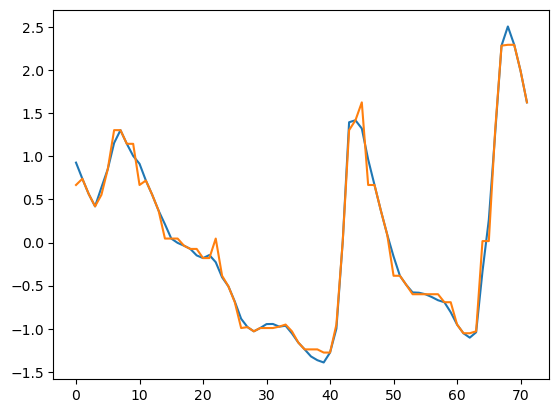

In [558]:
plt.plot(np.vstack((y_complete,y_predict)).T)